In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, stats


data = pd.read_csv('data/merged_filtered_without_dem-students.csv')


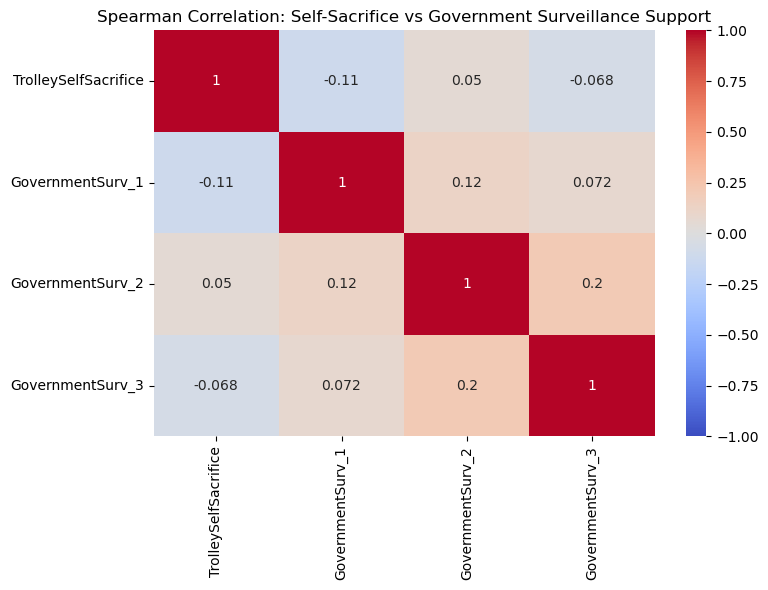

In [22]:

# Select the relevant columns
columns_a = ['TrolleySelfSacrifice', 'GovernmentSurv_1', 'GovernmentSurv_2', 'GovernmentSurv_3']
df_a = data[columns_a].dropna()

# Compute Spearman correlation matrix
corr_matrix, p_values = spearmanr(df_a)

# Convert to DataFrame
corr_df = pd.DataFrame(corr_matrix, index=columns_a, columns=columns_a)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman Correlation: Self-Sacrifice vs Government Surveillance Support")
plt.tight_layout()
plt.show()


1. The correlation matrix shows very weak correlations between TrolleySelfSacrifice and all three GovernmentSurv variables:

    GovernmentSurv_1: -0.11

    GovernmentSurv_2: 0.05

    GovernmentSurv_3: -0.068

These are all close to zero, indicating no strong monotonic relationship.

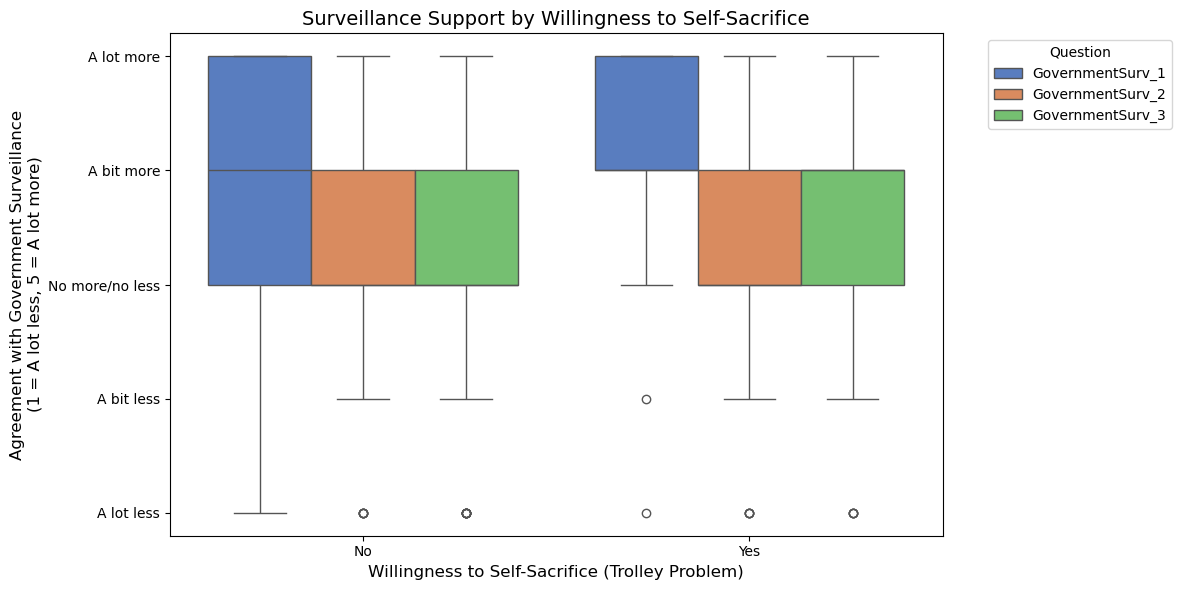

In [3]:
df_long = data.melt(id_vars='TrolleySelfSacrifice', 
                    value_vars=['GovernmentSurv_1', 'GovernmentSurv_2', 'GovernmentSurv_3'], 
                    var_name='Question', value_name='Agreement')

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='TrolleySelfSacrifice', y='Agreement', hue='Question', palette='muted')

# Customize
plt.title('Surveillance Support by Willingness to Self-Sacrifice', fontsize=14)
plt.xlabel('Willingness to Self-Sacrifice (Trolley Problem)', fontsize=12)
plt.ylabel('Agreement with Government Surveillance\n(1 = A lot less, 5 = A lot more)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

2. Boxplot Comparison (see boxpolot_task1.png)

The boxplot compares surveillance support grouped by TrolleySelfSacrifice response ("Yes" vs. "No"). We observe:

    Slight differences in median responses, with "Yes" responses tending slightly toward more support.

    However, the spread and overlap in distributions are considerable.

 Interpretation

    Expectation: One might hypothesize that individuals who are willing to self-sacrifice (possibly valuing collective good over personal cost) would also be more supportive of state surveillance, believing it serves the collective interest.

    Reality: The data suggests no meaningful association. The correlations are weak, and distributions largely overlap.

    Possible Reason: Willingness to self-sacrifice in moral dilemmas (like trolley problems) may reflect abstract ethical reasoning, whereas surveillance attitudes may be shaped more by trust in institutions, personal privacy concerns, or political beliefs.

In [4]:
surv_priv_map = {
    'Completely on the privacy side': 1,
    'Somewhat on the privacy side': 2,
    'Neutral': 3,
    'Somewhat on the surveillance side': 4,
    'Completely on the surveillance side': 5
}

concerns_map = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neither agree or disagree': 3,
    'Agree': 4,
    'Strongly agree': 5
}


In [8]:
df_b = data[['surveillanceVSpriv', 'ConcernsRating_12']].dropna()

df_b['surv_priv_score'] = df_b['surveillanceVSpriv'].map(surv_priv_map)
df_b['concern_score'] = df_b['ConcernsRating_12'].map(concerns_map)

# Drop any rows that didn't map correctly
df_b = df_b.dropna()

# Spearman correlation
corr, pval = spearmanr(df_b['surv_priv_score'], df_b['concern_score'])
print(f"Spearman Correlation: {corr:.2f}, p-value: {pval:.4f}")


Spearman Correlation: 0.33, p-value: 0.0003


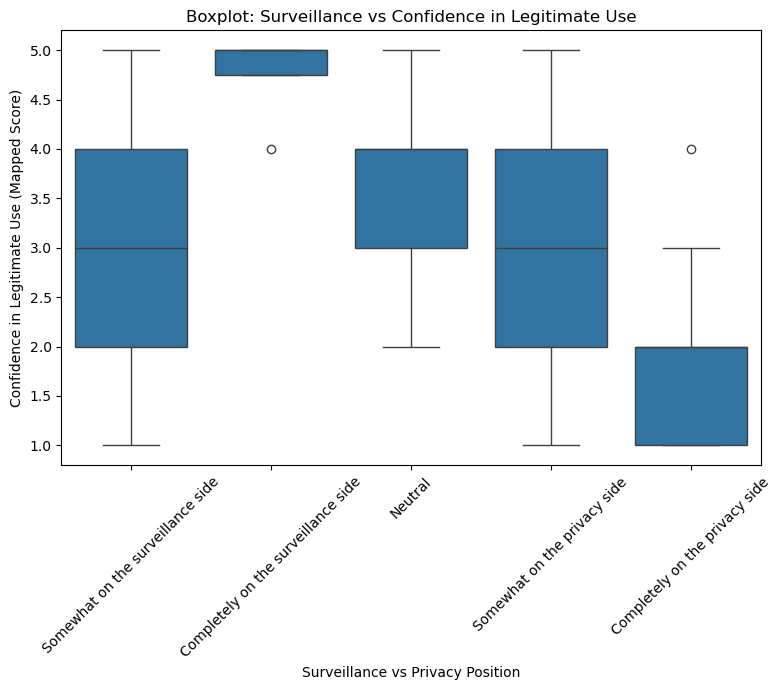

In [9]:
plt.figure(figsize=(8, 7))
sns.boxplot(x='surveillanceVSpriv', y='concern_score', data=df_b)
plt.xticks(rotation=45)
plt.ylabel("Confidence in Legitimate Use (Mapped Score)")
plt.xlabel("Surveillance vs Privacy Position")
plt.title("Boxplot: Surveillance vs Confidence in Legitimate Use")
plt.tight_layout()
plt.show()


Interpretation: People who are more supportive of surveillance measures also tend to believe more strongly that surveillance is being conducted for legitimate reasons.

Expectation: This is somewhat expected — trust in the intent of surveillance systems often correlates with support for their use.

Implication: This could reflect a general belief system where individuals either:

    Trust government/institutions and hence support surveillance.

    Or are skeptical, leading to privacy preference and distrust in motives.
    
    People who support surveillance tend to trust that it's used for valid, legitimate reasons.
    
    People leaning toward privacy concerns tend to lack confidence in legitimate surveillance use.
    
    This may indicate underlying trust/distrust in institutions or government mechanisms.

/var/folders/yw/pj19mfjx49g41ynt1w_gb_mh0000gn/T/ipykernel_97906/3296798601.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SurvLabel', y='BenefitHarmAvg', data=df_task_c, palette="coolwarm")


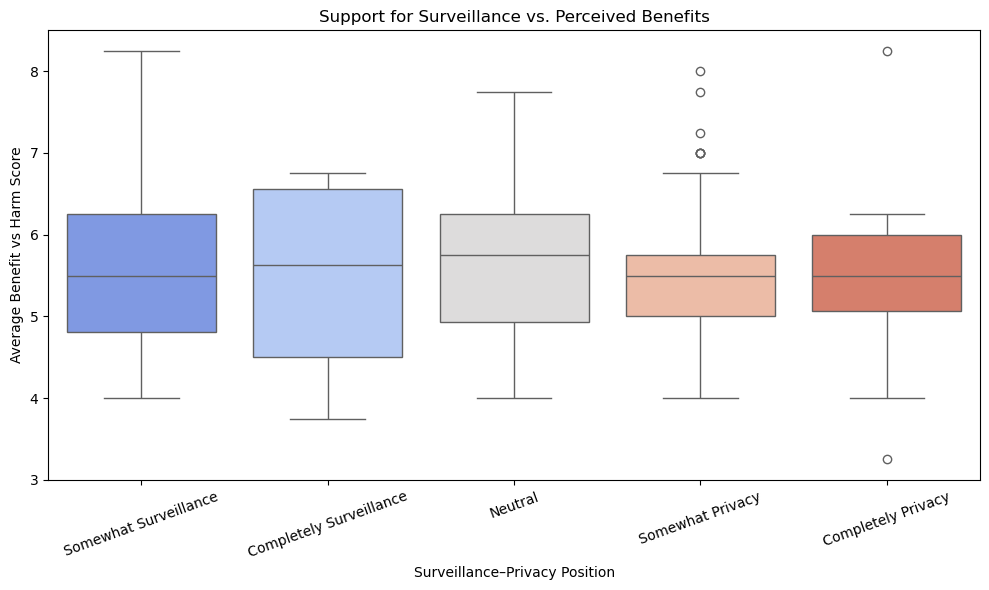

Spearman Correlation: -0.01, p-value: 0.9473


In [20]:
data = pd.read_csv('data/merged_filtered_without_dem-students.csv')


# --- Step 1: Map surveillanceVSpriv to numerical scale ---
surveillance_map = {
    "Completely on the surveillance side": 1,
    "Somewhat on the surveillance side": 2,
    "Neutral": 3,
    "Somewhat on the privacy side": 4,
    "Completely on the privacy side": 5
}
data['surveillanceVSpriv_numeric'] = data['surveillanceVSpriv'].map(surveillance_map)

# --- Step 2: Prepare BenefitHarmAverage ---
benefit_cols = ['BenefitHarmRating_1', 'BenefitHarmRating_2', 'BenefitHarmRating_3', 'BenefitHarmRating_4']
data[benefit_cols] = data[benefit_cols].apply(pd.to_numeric, errors='coerce')
data['BenefitHarmAvg'] = data[benefit_cols].mean(axis=1)

# --- Step 3: Drop NaNs ---
df_task_c = data[['surveillanceVSpriv_numeric', 'BenefitHarmAvg']].dropna()

# --- Step 4: Add category labels (optional for boxplot) ---
label_map = {
    1: "Completely Surveillance",
    2: "Somewhat Surveillance",
    3: "Neutral",
    4: "Somewhat Privacy",
    5: "Completely Privacy"
}
df_task_c['SurvLabel'] = df_task_c['surveillanceVSpriv_numeric'].map(label_map)

# --- Step 5: Boxplot ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='SurvLabel', y='BenefitHarmAvg', data=df_task_c, palette="coolwarm")
plt.title("Support for Surveillance vs. Perceived Benefits")
plt.xlabel("Surveillance–Privacy Position")
plt.ylabel("Average Benefit vs Harm Score")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# --- Step 6: Spearman Correlation ---
corr, pval = spearmanr(df_task_c['surveillanceVSpriv_numeric'], df_task_c['BenefitHarmAvg'])
print(f"Spearman Correlation: {corr:.2f}, p-value: {pval:.4f}")


The boxplot shows slightly higher median Benefit-vs-Harm scores for respondents on the surveillance-supporting side, especially those completely on the surveillance side.

However, the distribution overlaps heavily across groups.

People on the privacy side still report a fairly wide range of benefit-vs-harm scores — some even scoring high, contrary to what we might expect.

People's privacy/surveillance stance may be ideological or value-driven, rather than based on a rational benefit-harm assessment.

Alternatively, both pro- and anti-surveillance groups may recognize both risks and benefits, complicating a linear relationship.

➤ Conclusion: No meaningful association between general surveillance support and how participants perceive the balance of benefits vs harms.